In [21]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

In [22]:
text_file = open("center.txt", "r")
lines = text_file.readlines()
text_file.close()


In [23]:
angles = np.linspace(0, 360, 9)

In [24]:
angles


array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.])

In [25]:
def display_whole_bush(berry_pos):
    fig = plt.figure(figsize=(20, 20))
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    for i in range(len(angles)):
        ax = fig.add_subplot(3, 3, i+1, projection='3d')
        ax.scatter(berry_pos[:, 0], berry_pos[:, 1], berry_pos[:, 2], s=300, alpha=0.8)
        grid_range = 80
        ax.set_xlim(-grid_range, grid_range)
        ax.set_ylim(-grid_range, grid_range)
        ax.set_zlim(-grid_range, grid_range)

        ax.view_init(elev=0, azim=angles[i])
    fig.show()
    

In [26]:
text_file = open("center.txt", "r")
lines = text_file.readlines()
text_file.close()

berry_pos_temp  = [ [float(lines[i].split()[j]) for j in range(3)] for i in range(len(lines))]
berry_pos = np.array(berry_pos_temp)

In [27]:
berry_pos

array([[140.903   ,   5.51299 ,  12.2101  ],
       [124.512   ,  26.9611  ,   3.6145  ],
       [132.531   ,  18.9944  , -15.9717  ],
       [130.29    , -14.6264  , -15.0791  ],
       [141.328   ,  -0.165404, -16.9132  ],
       [ 86.1172  , -14.6333  , -23.9306  ],
       [117.233   , -17.3328  ,   4.08099 ],
       [109.806   ,  -5.97239 ,  23.375   ],
       [103.798   ,  16.5681  ,  -6.27794 ],
       [ 90.223   ,  28.326   ,  12.4307  ],
       [ 92.7882  ,  17.5657  ,  26.3185  ],
       [100.47    , -15.7098  ,   2.31073 ],
       [ 94.6005  , -14.9549  ,  19.6574  ],
       [ 89.762   ,   0.941944, -14.1928  ],
       [ 91.5039  ,  18.6466  ,   0.284666],
       [ 95.1187  ,   1.90599 ,  25.831   ],
       [ 78.8393  ,  16.1275  , -10.9563  ],
       [ 49.3935  ,  -0.548796, -11.4255  ],
       [ 54.7709  ,   5.93181 ,   3.90114 ],
       [ 58.0479  , -15.7121  ,  -1.90592 ],
       [ 65.4499  ,  -3.5279  ,  15.3423  ],
       [ 59.2225  ,  12.6272  , -10.5776  ],
       [ 6

/Users/tamurataito/opt/anaconda3/envs/grape_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


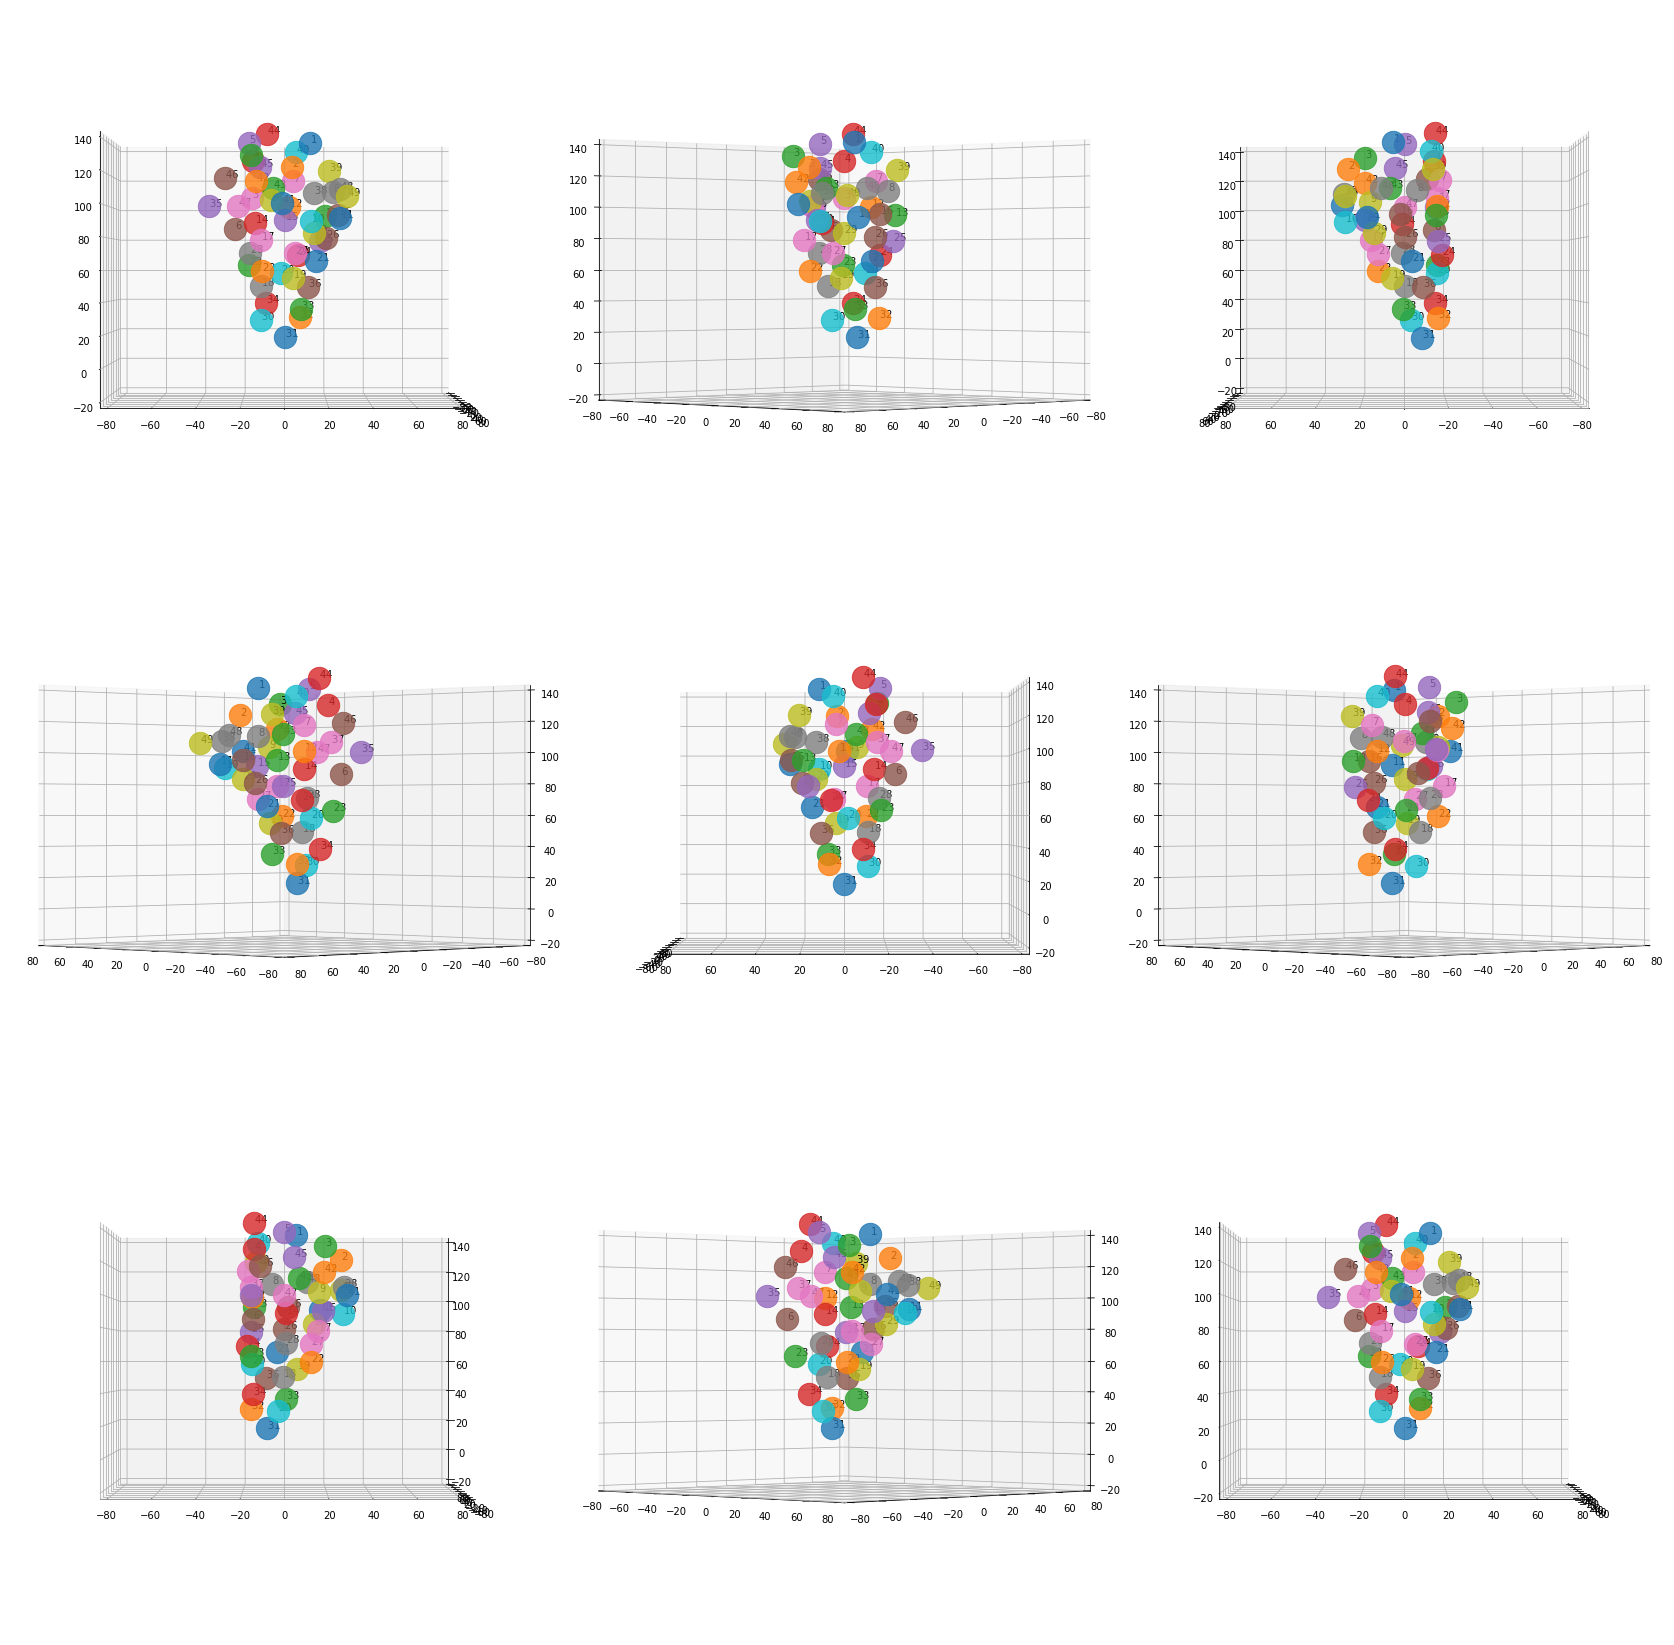

In [28]:
text_file = open("center.txt", "r")
lines = text_file.readlines()
text_file.close()

berry_pos_temp  = [ [float(lines[i].split()[j]) for j in range(3)] for i in range(len(lines))]
berry_pos = np.array(berry_pos_temp)
berry_pos = berry_pos[:, ( 1, 2, 0)]


fig = plt.figure(figsize=(30, 30))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
for i in range(len(angles)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    for j in range(len(berry_pos)):
        ax.scatter(berry_pos[j, 0], berry_pos[j, 1], berry_pos[j, 2], s=500, alpha=0.8)
        ax.text(berry_pos[j, 0], berry_pos[j, 1], berry_pos[j, 2], r'${0}$'.format(j+1), fontsize=10 )
    grid_range = 80
    range_adjust = 60
    ax.set_xlim(-grid_range, grid_range)
    ax.set_ylim(-grid_range, grid_range)
    ax.set_zlim(-grid_range+range_adjust, grid_range+range_adjust)

    ax.view_init(elev=0, azim=angles[i])
fig.show()

In [29]:
import random
# 重複なし
def rand_ints_nodup(a, b, k):
  ns = []
  while len(ns) < k:
    n = random.randint(a, b)
    if not n in ns:
      ns.append(n)
  return ns

def berry_vector_noising(vector, center_of_gravity):
    noise_variance = 0.15
    
    vector_scalar = np.linalg.norm(vector - center_of_gravity)
    
    unit_vector = (vector - center_of_gravity)/vector_scalar
    
    noised_vector = unit_vector + np.random.normal(0, noise_variance, 3)
    
    noised_vector = noised_vector*vector_scalar + center_of_gravity

    return noised_vector

37


/Users/tamurataito/opt/anaconda3/envs/grape_env/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


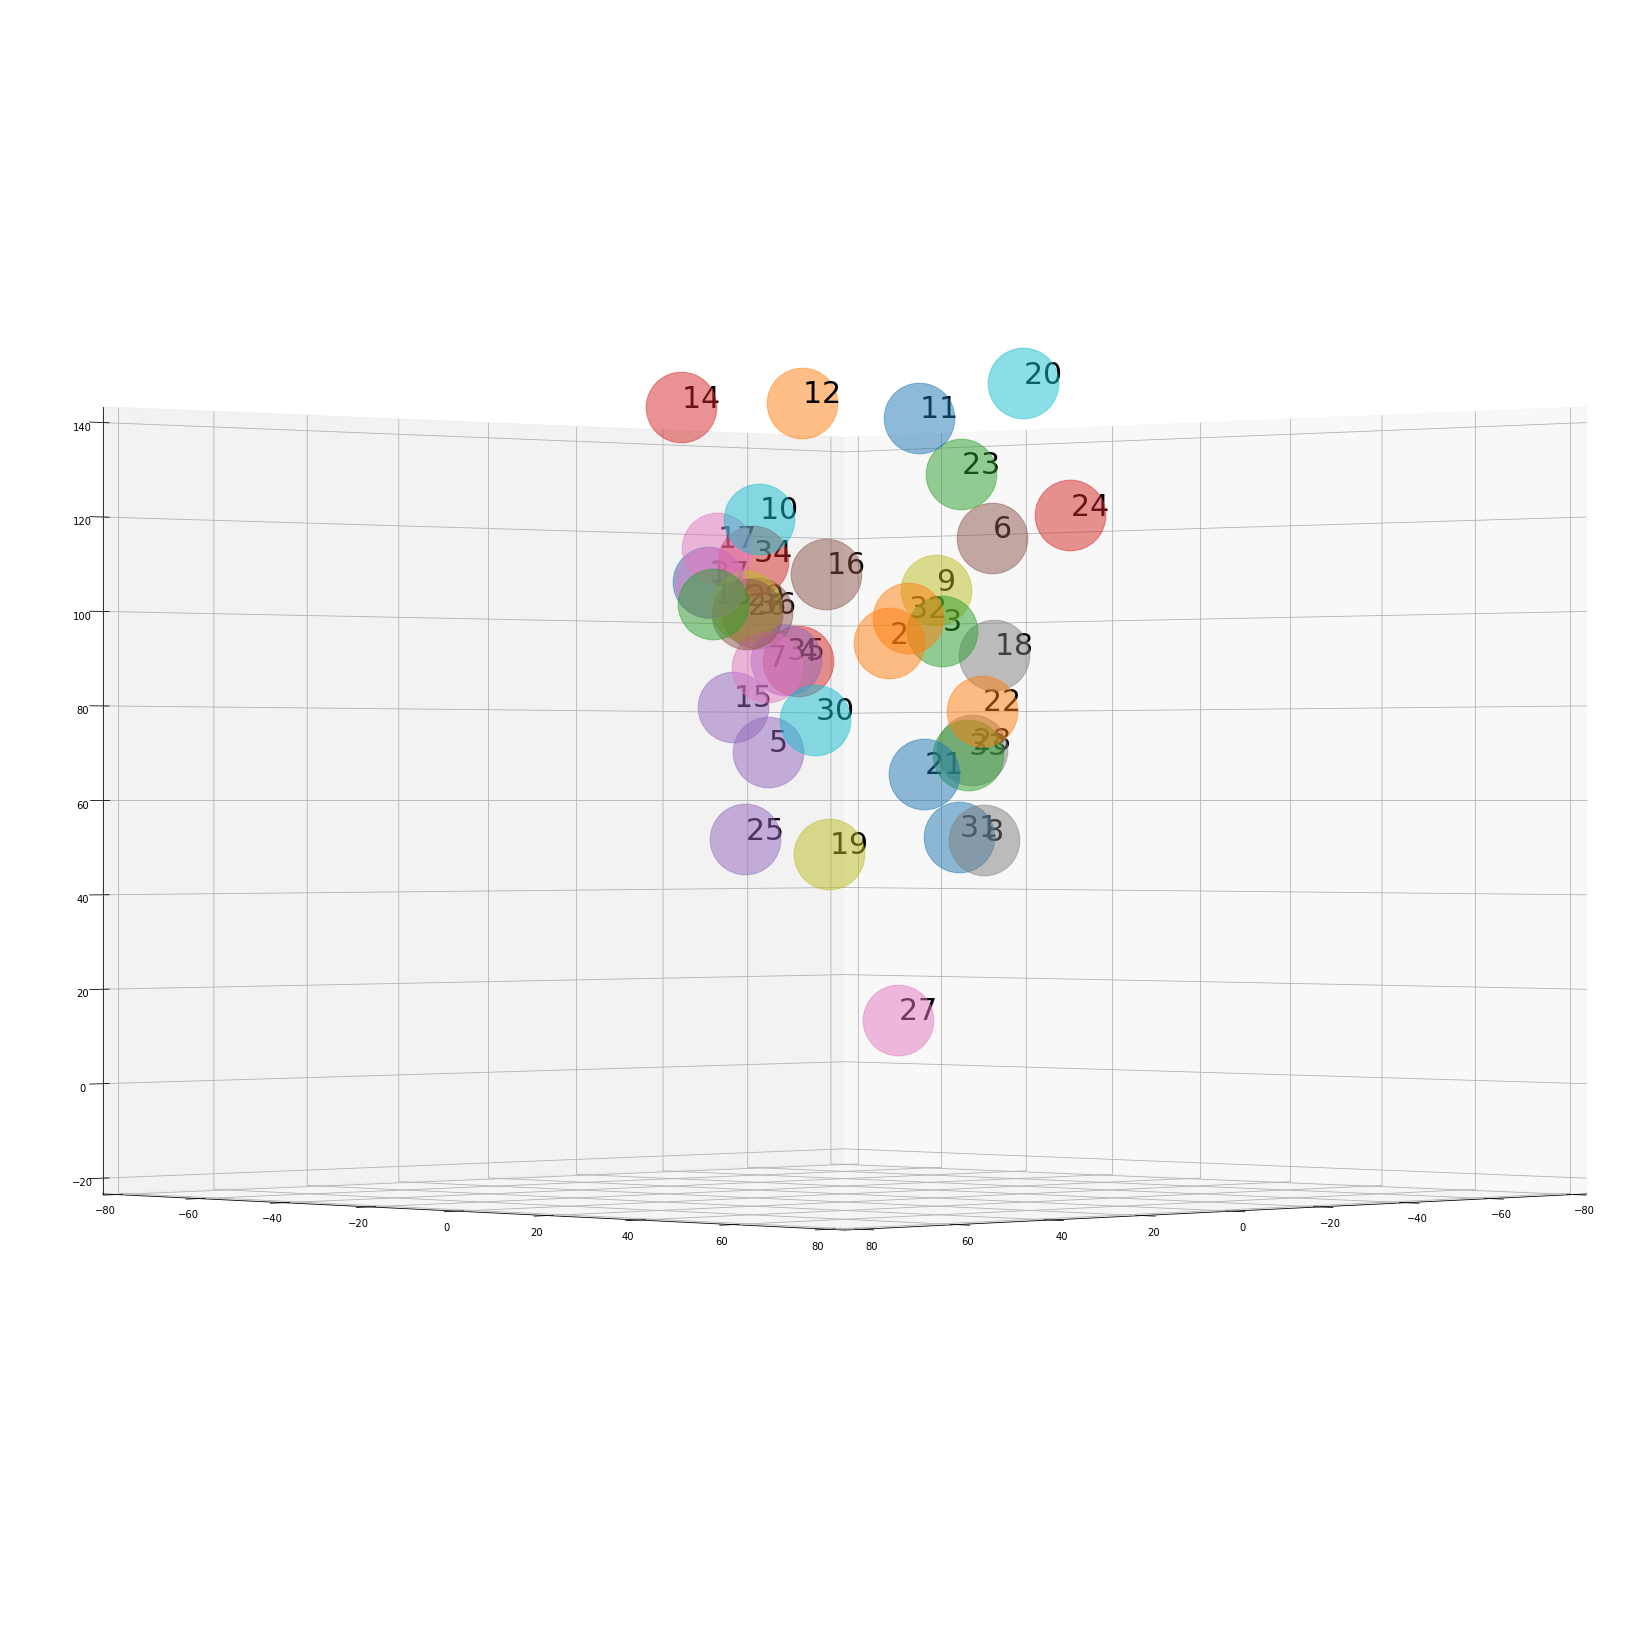

In [31]:
text_file = open("center.txt", "r")
lines = text_file.readlines()
text_file.close()

berry_pos_temp  = [ [float(lines[i].split()[j]) for j in range(3)] for i in range(len(lines))]
berry_pos = np.array(berry_pos_temp)

berry_pos = berry_pos[:, ( 1, 2, 0)]

center_of_gravity = berry_pos.mean(axis=0)
number_of_berries = np.random.randint(30, 49)
berry_pos_reduced=berry_pos[rand_ints_nodup(0, len(berry_pos)-1, number_of_berries)]

for i in range(len(berry_pos_reduced)):
    berry_pos_reduced[i] = berry_vector_noising(berry_pos_reduced[i], center_of_gravity)

print(number_of_berries)

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for j in range(len(berry_pos_reduced)):
    ax.scatter(berry_pos_reduced[j, 0], berry_pos_reduced[j, 1], berry_pos_reduced[j, 2], s=5000, alpha=0.5)
    ax.text(berry_pos_reduced[j, 0], berry_pos_reduced[j, 1], berry_pos_reduced[j, 2], r'${0}$'.format(j+1), fontsize=30 )
grid_range = 80
ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range+range_adjust, grid_range+range_adjust)

ax.view_init(elev=0, azim=45)
fig.show()

/Users/tamurataito/opt/anaconda3/envs/grape_env/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


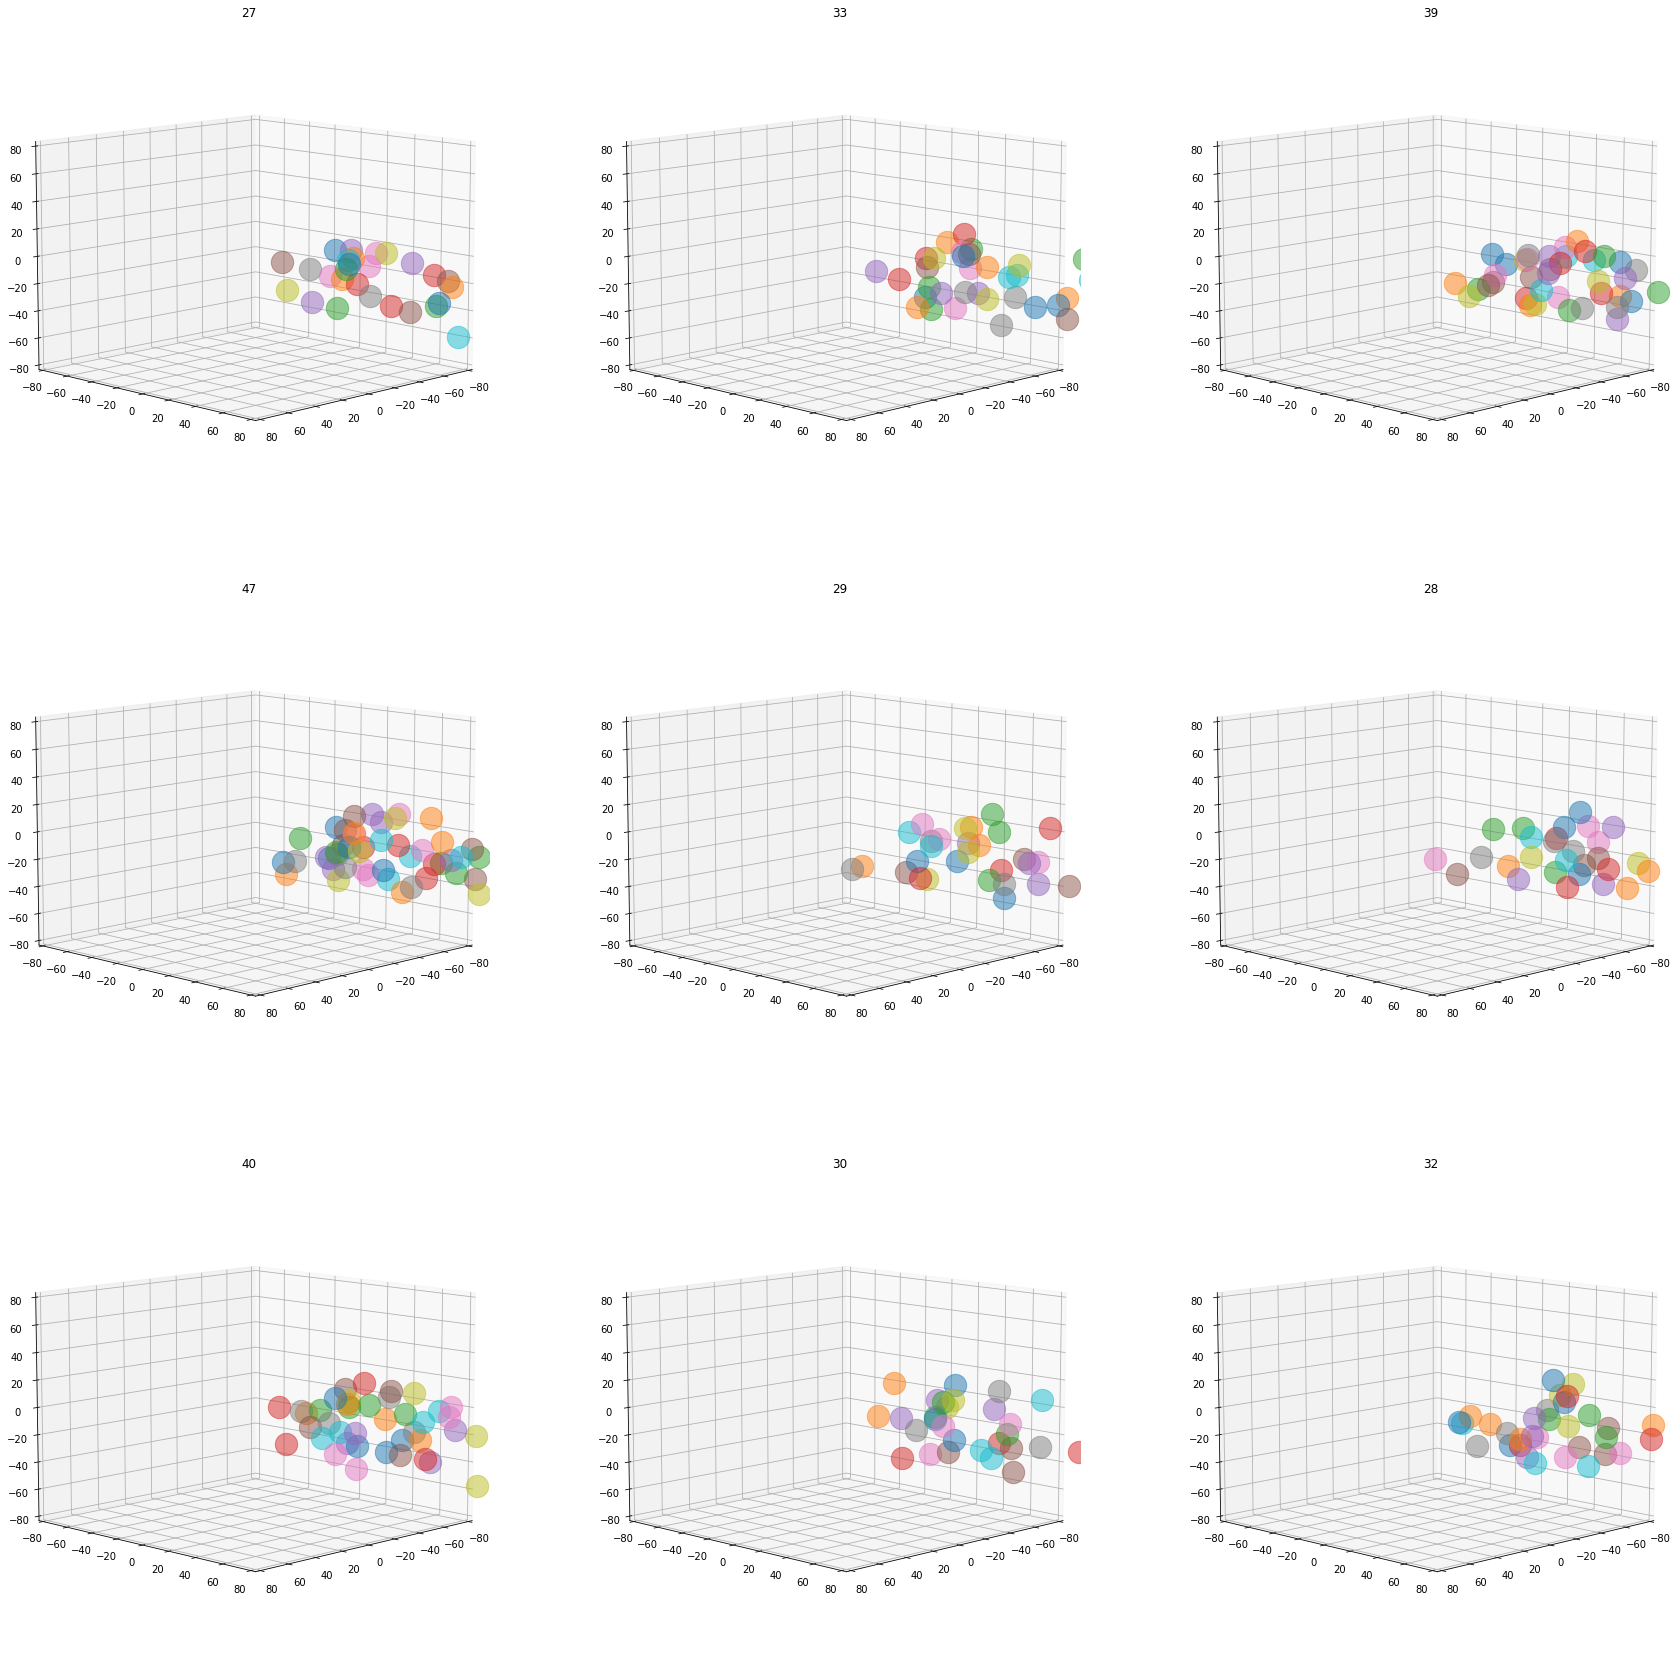

In [14]:
text_file = open("center.txt", "r")
lines = text_file.readlines()
text_file.close()

berry_pos_temp  = [ [float(lines[i].split()[j]) for j in range(3)] for i in range(len(lines))]
berry_pos = np.array(berry_pos_temp)

berry_pos = berry_pos[:, ( 2, 0, 1)]
center_of_gravity = berry_pos.mean(axis=0)


fig = plt.figure(figsize=(30, 30))

number_of_row = 3

for idx in range(number_of_row*number_of_row):
    
    number_of_berries = np.random.randint(25, 49)
    berry_pos_reduced=berry_pos[rand_ints_nodup(0, len(berry_pos)-1, number_of_berries)]

    for i in range(len(berry_pos_reduced)):
        berry_pos_reduced[i] = berry_vector_noising(berry_pos_reduced[i], center_of_gravity)

    ax = fig.add_subplot(number_of_row, number_of_row, idx+1, projection='3d')
    for j in range(len(berry_pos_reduced)):
        ax.scatter(berry_pos_reduced[j, 0], berry_pos_reduced[j, 1], berry_pos_reduced[j, 2], s=500, alpha=0.5)
    grid_range = 80
    ax.set_xlim(-grid_range, grid_range)
    ax.set_ylim(-grid_range, grid_range)
    ax.set_zlim(-grid_range, grid_range)
    plt.title(r"{0}".format(number_of_berries))
    ax.view_init(elev=10, azim=45)
fig.show()

In [144]:
berry_pos_reduced

array([[-2.49920069e+01, -4.68572255e+00, -6.00195993e+01],
       [ 6.94385393e-02, -1.77671540e+01,  2.00271042e+00],
       [-2.03980897e+01, -1.33467654e+01, -2.85332077e+01],
       [ 2.90469774e+01, -1.32210343e+01,  2.55613333e+01],
       [ 2.85525042e+01, -3.86182467e-02,  3.43041993e+00],
       [-1.22429393e+01, -1.19159329e+01, -1.04690311e+01],
       [ 4.50324343e-01, -1.34919088e+01, -2.14834111e+01],
       [-3.20539502e+01,  2.52067375e+01,  4.92727420e+00],
       [-1.77745130e+01,  2.03509215e+01,  4.03713474e+01],
       [ 1.49307155e+01, -1.28374885e+01, -7.69750190e+00],
       [ 3.05726939e+01, -1.50518499e+01,  5.71061848e+00],
       [-1.79719108e+01, -1.53595540e+00, -1.95153807e+01],
       [-6.23155766e-01,  1.70343522e+01,  2.84220908e+01],
       [ 2.34137288e+01,  1.41334685e+01,  1.96656838e+01],
       [ 7.81273433e+00, -3.26031345e+01,  2.41627510e+00],
       [-1.25347466e+01,  1.68452472e+01,  1.00514743e+01],
       [-1.64137141e+01, -2.07679183e+01

In [94]:
len(berry_pos)

49

In [4]:
import random
# 重複なし
def rand_ints_nodup(a, b, k):
  ns = []
  while len(ns) < k:
    n = random.randint(a, b)
    if not n in ns:
      ns.append(n)
  return ns

In [74]:
berry_pos.mean(axis=0)

array([-1.96000000e-05,  3.08367347e-05, -1.02244898e-05])

In [75]:
berry_pos

array([[ 1.20111e+01, -4.75964e+00,  5.04278e+01],
       [ 3.41553e+00, -2.62077e+01,  3.40368e+01],
       [-1.61707e+01, -1.82410e+01,  4.20559e+01],
       [-1.52781e+01,  1.53798e+01,  3.98148e+01],
       [-1.71122e+01,  9.18756e-01,  5.08529e+01],
       [-2.41296e+01,  1.53867e+01, -4.35795e+00],
       [ 3.88202e+00,  1.80862e+01,  2.67579e+01],
       [ 2.31760e+01,  6.72574e+00,  1.93308e+01],
       [-6.47691e+00, -1.58147e+01,  1.33228e+01],
       [ 1.22317e+01, -2.75726e+01, -2.52151e-01],
       [ 2.61195e+01, -1.68123e+01,  2.31305e+00],
       [ 2.11176e+00,  1.64632e+01,  9.99485e+00],
       [ 1.94584e+01,  1.57083e+01,  4.12535e+00],
       [-1.43918e+01, -1.88592e-01, -7.13150e-01],
       [ 8.56958e-02, -1.78932e+01,  1.02875e+00],
       [ 2.56320e+01, -1.15264e+00,  4.64355e+00],
       [-1.11553e+01, -1.53741e+01, -1.16358e+01],
       [-1.16245e+01,  1.30215e+00, -4.10816e+01],
       [ 3.70217e+00, -5.17846e+00, -3.57043e+01],
       [-2.10489e+00,  1.64655e

In [29]:
text_file = open("center_2.txt", "r")
lines = text_file.readlines()
text_file.close()

/Users/tamurataito/opt/anaconda3/envs/grape_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


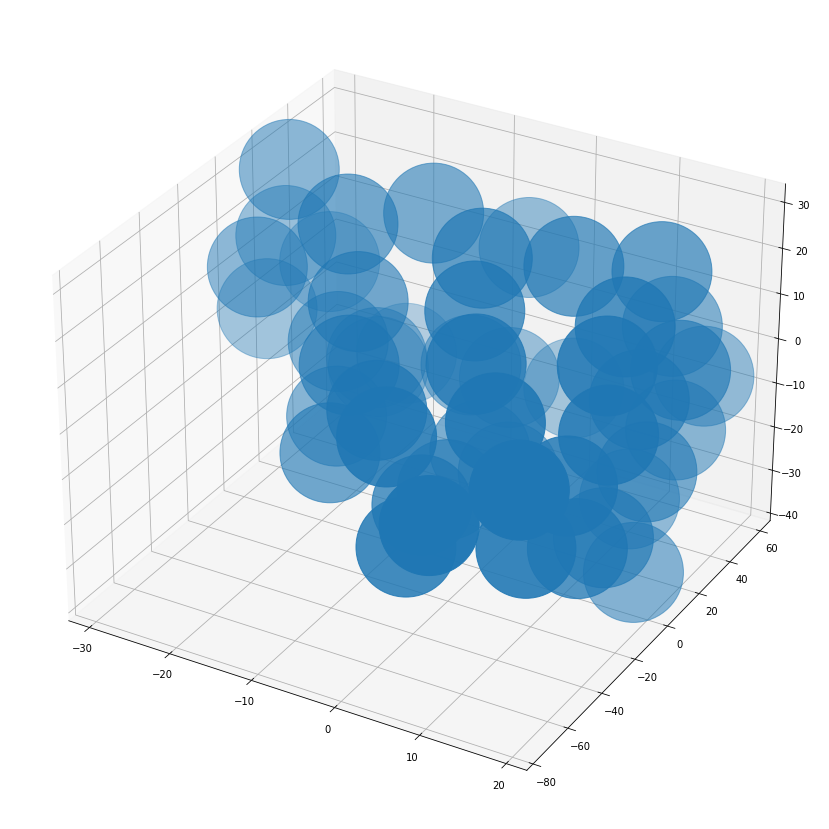

In [30]:
berry_pos_temp  = [ [float(lines[i].split()[j]) for j in range(3)] for i in range(len(lines))]
berry_pos = np.array(berry_pos_temp)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(berry_pos[:, 0], berry_pos[:, 1], berry_pos[:, 2], s=10000)
fig.show()